In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils #將label標籤轉換為one-hot encoding
np.random.seed(10)

In [2]:
from keras.datasets import mnist

In [5]:
#第一次執行下載mnist資料，之後可直接讀取
(X_train_image, y_train_label), \
(X_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step

In [6]:
#查看mnist資料
print("train data=",len(X_train_image))
print(" test data=",len(X_test_image))

train data= 60000
 test data= 10000


In [7]:
#查看訓練資料
print("X_train_image:",X_train_image.shape)
print("y_train_label:",y_train_label.shape)

X_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [13]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf() #設定圖型大小
    fig.set_size_inches(2,2) #設定圖型大小
    plt.imshow(image, cmap="binary") #binary代表黑白灰階顯示
    plt.show()

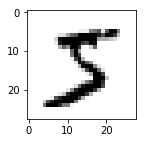

In [14]:
plot_image(X_train_image[0])

In [15]:
y_train_label[0]

5

In [16]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #傳入參數數字影像、真實值、預測結果、開始顯示資料、資料筆數
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: 
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap="binary") #畫出subgraph
        title = "label=" + str(labels[idx]) #設定title,顯示標籤
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) #如果有傳入預測結果，title加入預設結果
        ax.set_title(title,fontsize=10) #設定title與大小
        ax.set_xticks([]) #不顯示刻度
        ax.set_yticks([])
        idx += 1 #讀取下一筆
    plt.show()

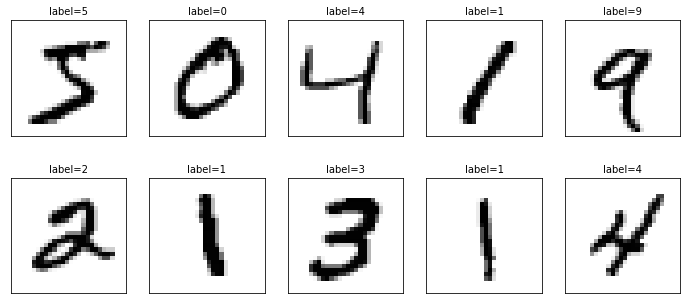

In [17]:
#查看訓練資料前10筆（圖形與真實值）
plot_images_labels_prediction(X_train_image,y_train_label,[],0,10)

In [18]:
#查看測試資料
print("X_tset_image:",X_test_image.shape)
print("y_test_label:",y_test_label.shape)

X_tset_image: (10000, 28, 28)
y_test_label: (10000,)


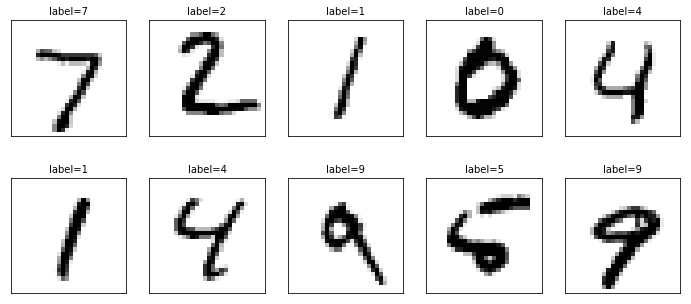

In [19]:
#查看測試資料前10筆（圖形與真實值）
plot_images_labels_prediction(X_test_image,y_test_label,[],0,10)

# Feature特徵值資料前處理

In [20]:
#將原本28 x 28的二維向量轉為784的一維向量,並轉為小數值
X_Train = X_train_image.reshape(60000,784).astype('float32')
X_Test = X_test_image.reshape(10000,784).astype('float32')

In [21]:
#查看轉為一維的資料
print("x_train:",X_Train.shape)
print("x_test:",X_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [27]:
#內容為0~255組成
X_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
#標準化
X_Train_normalize = X_Train/255
X_Test_normalize = X_Test/255

In [29]:
X_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# label真實值資料前處理

In [30]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [31]:
#label原本為0~9的資料，必須經過one-hot encoding轉換為10個連續數字，正好對應到輸出層10個神經元
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [32]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])